Recording... Speak now!
Recording complete.


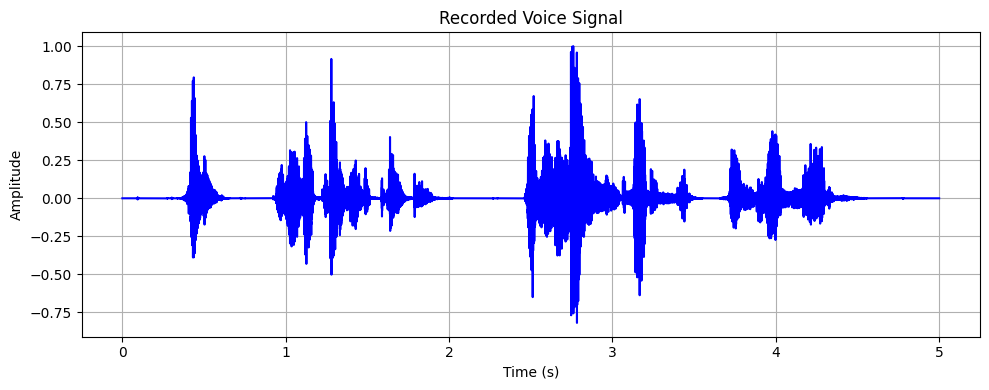

In [4]:
!pip install sounddevice

import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt

# Parameters for recording
sample_rate = 44100  # 44.1 kHz
duration = 5  # Duration of recording in seconds

# Record audio
print("Recording... Speak now!")
audio_data = sd.rec(int(sample_rate * duration), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait for recording to finish
print("Recording complete.")

# Save audio as a WAV file
write("recorded_audio.wav", sample_rate, (audio_data * 32767).astype(np.int16))

# Normalize audio data for plotting
normalized_audio = audio_data.flatten() / np.max(np.abs(audio_data))

# Time axis for plotting
time_axis = np.linspace(0, duration, len(normalized_audio))

# Plot the recorded audio
plt.figure(figsize=(10, 4))
plt.plot(time_axis, normalized_audio, color='blue')
plt.title("Recorded Voice Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
!pip install sounddevice scipy matplotlib numpy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\solom\AppData\Local\Temp\ipykernel_23172\1950549839.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')


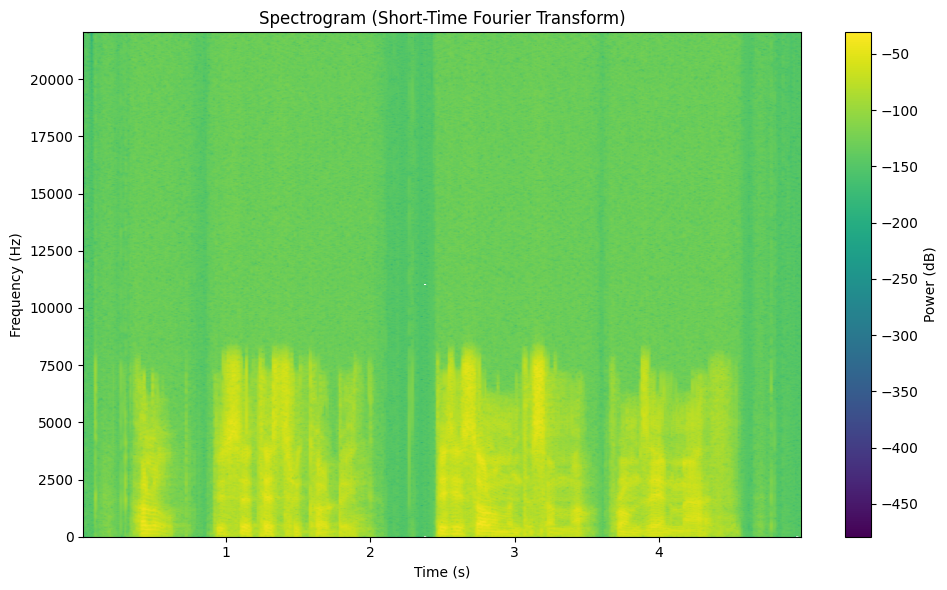

In [8]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io.wavfile import read

# Load the recorded audio file
sample_rate, audio = read("recorded_audio.wav")

# If audio has more than one channel, use only the first channel
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Normalize the audio
audio = audio / np.max(np.abs(audio))

# Define parameters for the Short-Time Fourier Transform
nperseg = 1024  # Length of each segment
noverlap = 512  # Overlap between segments

# Perform the Short-Time Fourier Transform and compute the spectrogram
frequencies, times, Sxx = spectrogram(audio, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.title("Spectrogram (Short-Time Fourier Transform)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power (dB)")
plt.tight_layout()
plt.show()


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


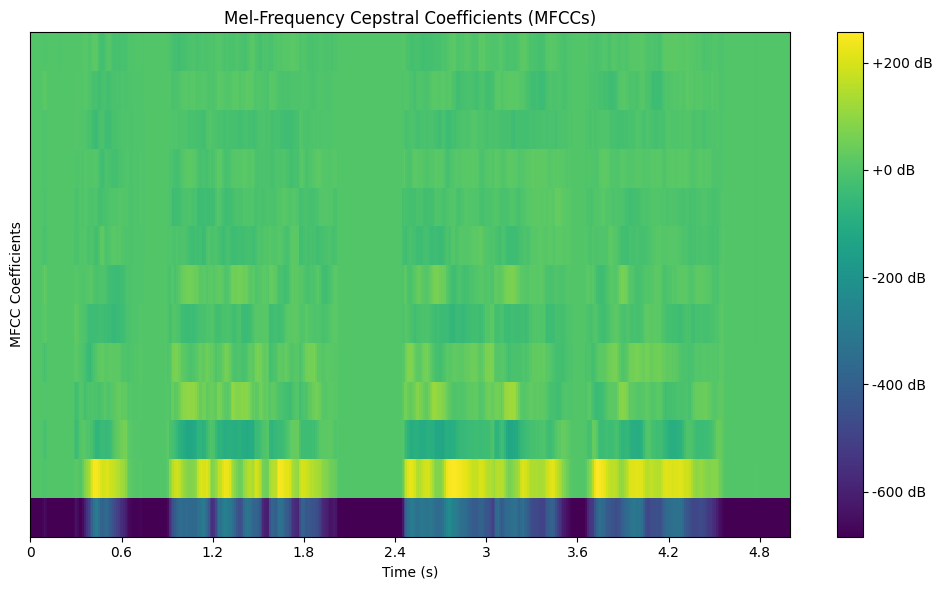

In [12]:
# !pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = "recorded_audio.wav"  # Replace with the path to your audio file
audio, sample_rate = librosa.load(audio_file, sr=None)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()
